Name: Rene Solis

Course: Applied Data Science

Assignment: Project 3

#### Libraries

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statistics import mean
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np
import collections

#### DataFrame

In [113]:
df = pd.read_csv('Affairs.csv')

In [114]:
print(df)

     Unnamed: 0  affairs  gender   age  yearsmarried children  religiousness  \
0             4        0    male  37.0         10.00       no              3   
1             5        0  female  27.0          4.00       no              4   
2            11        0  female  32.0         15.00      yes              1   
3            16        0    male  57.0         15.00      yes              5   
4            23        0    male  22.0          0.75       no              2   
..          ...      ...     ...   ...           ...      ...            ...   
596        1938        1    male  22.0          1.50      yes              1   
597        1941        7  female  32.0         10.00      yes              2   
598        1954        2    male  32.0         10.00      yes              2   
599        1959        2    male  22.0          7.00      yes              3   
600        9010        1  female  32.0         15.00      yes              3   

     education  occupation  rating  
0 

#### Columns

In [115]:
print(df.columns)

Index(['Unnamed: 0', 'affairs', 'gender', 'age', 'yearsmarried', 'children',
       'religiousness', 'education', 'occupation', 'rating'],
      dtype='object')


#### Summary

In [116]:
print(df.drop(['Unnamed: 0'], axis=1).describe())

          affairs         age  yearsmarried  religiousness   education  \
count  601.000000  601.000000    601.000000     601.000000  601.000000   
mean     1.455907   32.487521      8.177696       3.116473   16.166389   
std      3.298758    9.288762      5.571303       1.167509    2.402555   
min      0.000000   17.500000      0.125000       1.000000    9.000000   
25%      0.000000   27.000000      4.000000       2.000000   14.000000   
50%      0.000000   32.000000      7.000000       3.000000   16.000000   
75%      0.000000   37.000000     15.000000       4.000000   18.000000   
max     12.000000   57.000000     15.000000       5.000000   20.000000   

       occupation      rating  
count  601.000000  601.000000  
mean     4.194676    3.931780  
std      1.819443    1.103179  
min      1.000000    1.000000  
25%      3.000000    3.000000  
50%      5.000000    4.000000  
75%      6.000000    5.000000  
max      7.000000    5.000000  


#### Missing Values

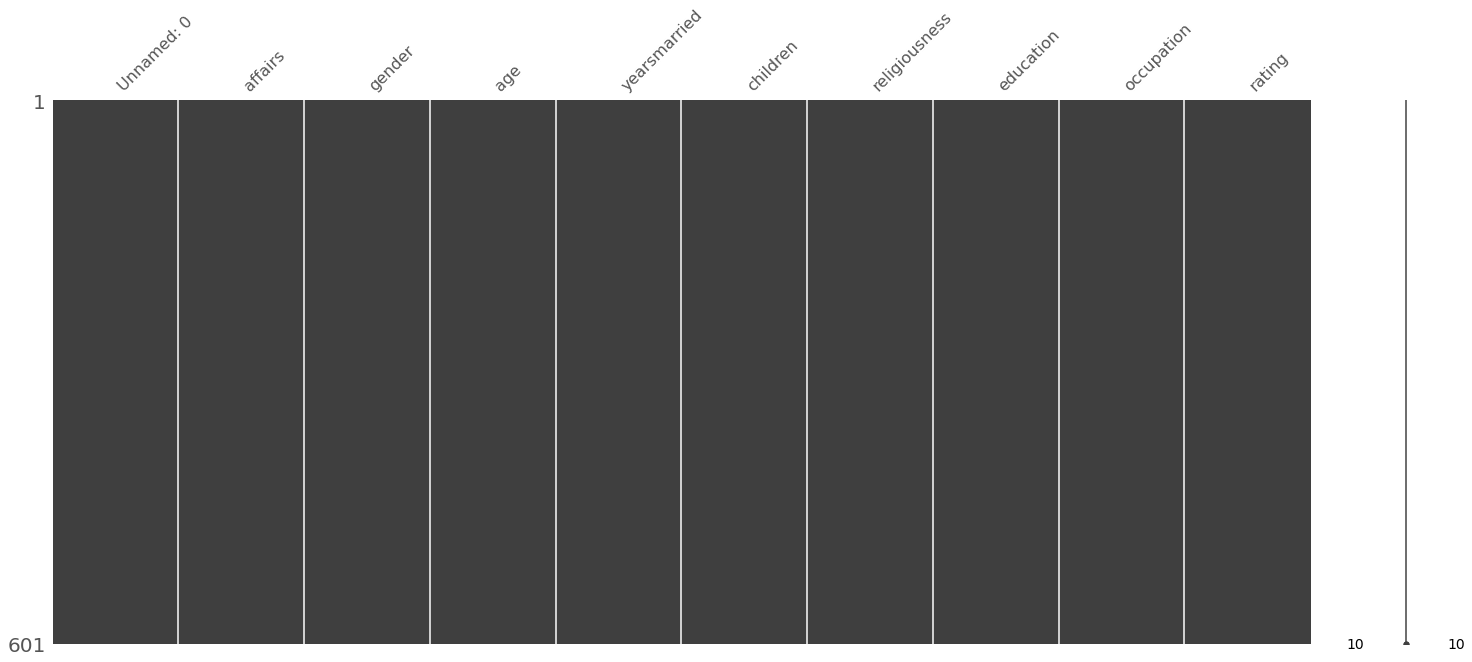

In [117]:
msno.matrix(df)
plt.show()

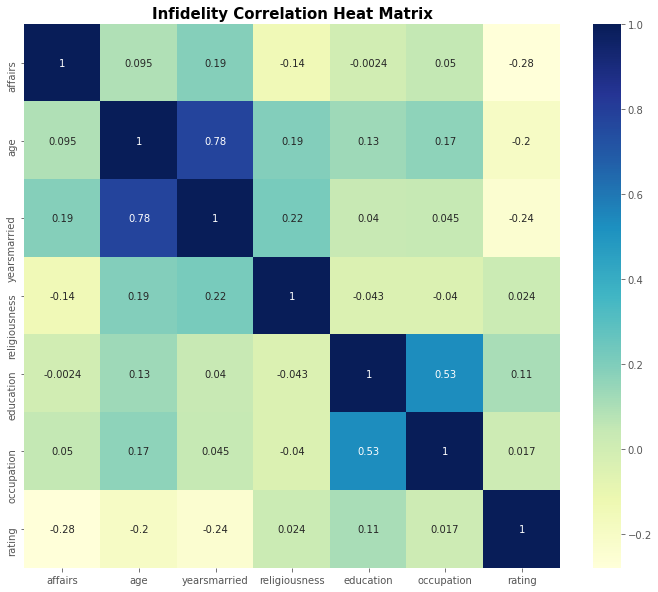

In [118]:
df_sex = df.drop(['gender', 'children', 'Unnamed: 0'], axis=1)
corrMatrix = df_sex.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrMatrix, annot=True, cmap='YlGnBu')
plt.title('Infidelity Correlation Heat Matrix', fontsize=15, color = 'black', fontweight='bold')
plt.show()

#### Happiness Rating and Number of Affairs

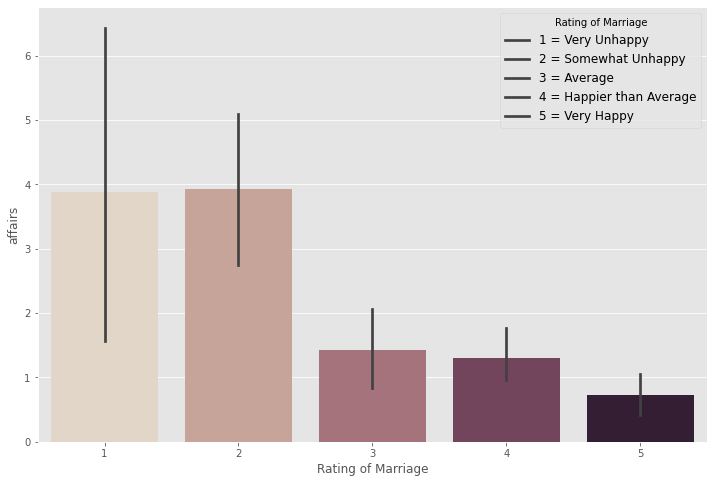

In [119]:
labels=['1 = Very Unhappy','2 = Somewhat Unhappy','3 = Average','4 = Happier than Average','5 = Very Happy']

plt.figure(figsize=(12,8))
sns.barplot(x='rating', y='affairs', data=df, palette='ch:.25')
plt.xlabel('Rating of Marriage')
plt.legend(labels,fontsize='large',title='Rating of Marriage')
plt.show()

#### Affair by Sex

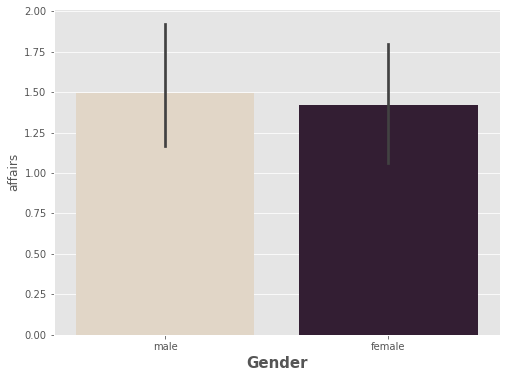

In [120]:
plt.figure(figsize=(8,6))
sns.barplot(x='gender', y='affairs', palette='ch:.25', data=df)
plt.xlabel('Gender', fontsize=15, fontweight='bold')
plt.show()

In [121]:
df1 = df.drop(['Unnamed: 0', 'age', 'yearsmarried', 'children',
       'religiousness', 'education', 'occupation', 'rating'], axis=1)


sexes = df1.groupby('gender')
females = sexes.get_group('female')
males = sexes.get_group('male')

#### Male Affair Frequency

In [122]:
print(males['affairs'].value_counts().sort_values(ascending=False))
print('\n')
print(males.describe())

0     208
7      20
1      19
12     18
3      11
2      10
Name: affairs, dtype: int64


          affairs
count  286.000000
mean     1.496503
std      3.292467
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max     12.000000


#### Female Affair Frequency

In [123]:
print(females['affairs'].value_counts().sort_values(ascending=False))
print('\n')
print(females.describe())

0     243
7      22
12     20
1      15
3       8
2       7
Name: affairs, dtype: int64


          affairs
count  315.000000
mean     1.419048
std      3.309264
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max     12.000000


#### Plotting Affair Frequency by Sex

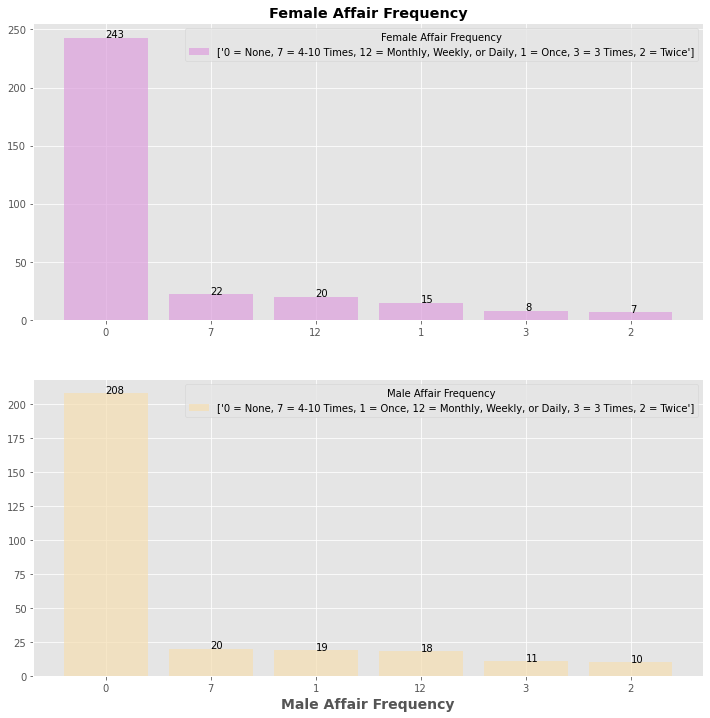

In [124]:

female_affair_freq=['0 = None, 7 = 4-10 Times, 12 = Monthly, Weekly, or Daily, 1 = Once, 3 = 3 Times, 2 = Twice']

male_affair_freq=['0 = None, 7 = 4-10 Times, 1 = Once, 12 = Monthly, Weekly, or Daily, 3 = 3 Times, 2 = Twice']


plt.figure(figsize=(12,12))
plt.subplot(2,1,1)

a = pd.Series(['0', '7', '12', '1', '3', '2'])
b = [243,22,20,15,8,7]
aa = a.astype('category')

plt.bar(aa, b, color = 'plum', fill='black', alpha=0.7, label=female_affair_freq)
plt.title('Female Affair Frequency', fontweight='bold')
plt.legend(fontsize='medium', title='Female Affair Frequency')
for h, j in enumerate(b):
    plt.text(aa[h], j, str(j))

plt.subplot(2,1,2)
c = pd.Series(['0','7','1','12','3','2'])
d = [208,20,19,18,11,10]
cc = c.astype('category')

plt.bar(cc, d, color='wheat', fill='black', alpha=0.7, label=male_affair_freq)
plt.xlabel('Male Affair Frequency', fontsize= 14, fontweight='bold')
plt.legend(fontsize='medium',title='Male Affair Frequency')
for i, v in enumerate(d):
    plt.text(cc[i], v, str(v))
plt.show()

#### Preparing Data for Regression Model

In [125]:
y = df['affairs']
X = df[['yearsmarried','religiousness', 'rating']]

#### Split Validation

In [126]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10, shuffle=True)

#### Fitting Model

In [127]:
# Statsmodel model
smodel = sm.OLS(y_train, x_train)

# Training model
results = smodel.fit()

# Printing results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                affairs   R-squared (uncentered):                   0.188
Model:                            OLS   Adj. R-squared (uncentered):              0.182
Method:                 Least Squares   F-statistic:                              32.12
Date:                Tue, 05 Jan 2021   Prob (F-statistic):                    1.07e-18
Time:                        22:17:22   Log-Likelihood:                         -1084.5
No. Observations:                 420   AIC:                                      2175.
Df Residuals:                     417   BIC:                                      2187.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

#### Testing Model

In [128]:
tmodel = sm.OLS(y_test, x_test)

resultt = tmodel.fit()

print(resultt.summary())

                                 OLS Regression Results                                
Dep. Variable:                affairs   R-squared (uncentered):                   0.190
Model:                            OLS   Adj. R-squared (uncentered):              0.177
Method:                 Least Squares   F-statistic:                              13.95
Date:                Tue, 05 Jan 2021   Prob (F-statistic):                    3.29e-08
Time:                        22:17:22   Log-Likelihood:                         -475.62
No. Observations:                 181   AIC:                                      957.2
Df Residuals:                     178   BIC:                                      966.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

#### Attributes of Prediction Model

<Figure size 864x720 with 0 Axes>

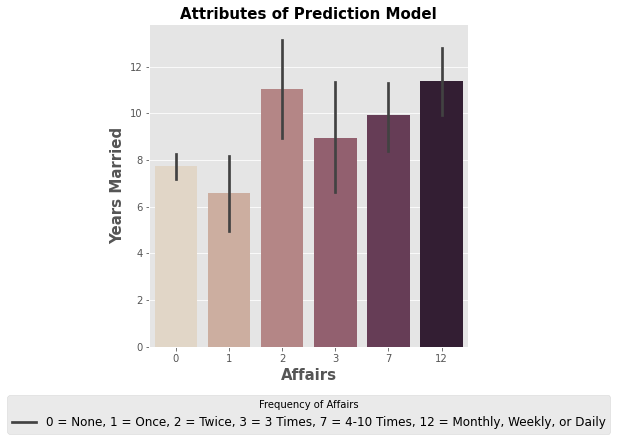

In [134]:
affair_freq=['0 = None, 1 = Once, 2 = Twice, 3 = 3 Times, 7 = 4-10 Times, '
             '12 = Monthly, Weekly, or Daily']

plt.figure(figsize=(12,10))
sns.catplot(x='affairs', y='yearsmarried', kind='bar', palette='ch:.25', data=df)
plt.xlabel('Affairs', fontsize=15, fontweight='bold')
plt.ylabel('Years Married', fontsize=15, fontweight='bold')
plt.title('Attributes of Prediction Model', fontsize=15, fontweight='bold')
plt.legend(affair_freq, bbox_to_anchor=(0.5, -0.29),fontsize='large',loc='lower center', title='Frequency of Affairs')
plt.show()